# $Requirements$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop , SGD , Adam
from tensorflow.keras.layers import Input

# $Model~Architecture$

In [ ]:

input = Input(shape = (1 , )) #shape = (1 ,) =>a ,the input has only one dimension called x .
x = layers.Dense(3 ,activation = 'tanh' )(input) #As , the domain has negative values , it is reasonable to consider Tanh as an activation func.
x = layers.Dense(1)(x)
model = Model(inputs = input , outputs =x )


In [ ]:
import math

In [ ]:
# Step Learnig Rate Decay .
from keras.callbacks import LearningRateScheduler # is a callback for interactive lr.
def step_decay(epochs):
  learning_rate = 0.1 #optimal is 0.1
  drop= 0.9 #optimal is 0.5
  epochs_drop = 3 #optimal is 3
  lrate = learning_rate * math.pow(drop, math.floor((epochs)/epochs_drop))
  return lrate
	

In [ ]:
#CONFIGURATION

# learning schedule callback
lrate = LearningRateScheduler(step_decay,verbose=0)
callbacks_list = [lrate]

momentum = 0.0 # momentum = 0.0 giving good result .
optimizer = SGD(lr=0.0 , momentum = momentum )
model.compile(loss='mse',
              optimizer=optimizer,
              
              )


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


# $Creating~ DataSet$

In [ ]:

data_size = 15000 #optimal is 15000

train_per = 0.98 # 98% of the data is for training.

train_size = int(data_size * train_per)

x = np.linspace(-10, 10, data_size) #lin_space is used to return data_size number of evenly spaced numbers over the interval [-1,1]
x =x/x.max()
np.random.shuffle(x) #To shuffle the contents

# Generate the output data using equation y =5*x**3+2*x**2+6*x+8 + noise
y =5*x**3+2*x**2+6*x+8 + np.random.normal(0, 0.05, (data_size, )) #Draw random samples -> 0 - centre, 0.05 - standard deviation ,(data_size, ) - output shape

# Split into test and train pairs

x_train, y_train = x[:train_size ], y[:train_size ]
x_test, y_test = x[train_size:], y[train_size:]



In [ ]:
x_train

array([ 0.22474832, -0.94839656,  0.55263684, ...,  0.29061937,
        0.73411561, -0.49129942])

In [ ]:
x_train.shape

(14700,)

In [ ]:
n_test  = x_test.shape[0]

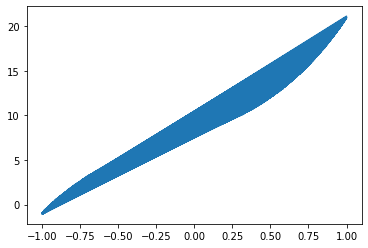

In [ ]:
plt.plot(x_train , y_train)

Look , from the above plot , y_train vs x_train is not a simple straight line but having a merginal amount of noise in y_train values .Clearly , evident from the distribution of y values .\
It is being introduced purposefully , to dataset to make it more regorous and robust .

In [ ]:
x_train.shape

(14700,)

# Fitting the model

In [ ]:
history = model.fit(x_train , y_train ,
                    validation_data = (x_test , y_test),
                    validation_steps = n_test//10 , 
          epochs = 32 , #optimal is 32
          verbose = 0,
          callbacks = callbacks_list)

print('final loss value : ' ,history.history['loss'][-1])

final loss value :  0.0049127680249512196


So , the final loss value is in the range of  $ \sim 10^{-3} .$ 


So , it would give a good result . 

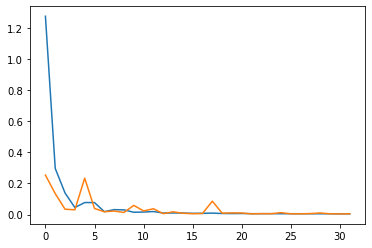

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

# Comparison

Now , the feature spacce becomes 3-D in the first hidden layer , having the dimemsions of $x_1$ , $x_2$ , $x_3$ . 


In the last layer the o/p feature space will be of 1-D , the o/p becomes :\
$y = a_1 x_1 +a_2 x_2 +a_3 x_3 +b$

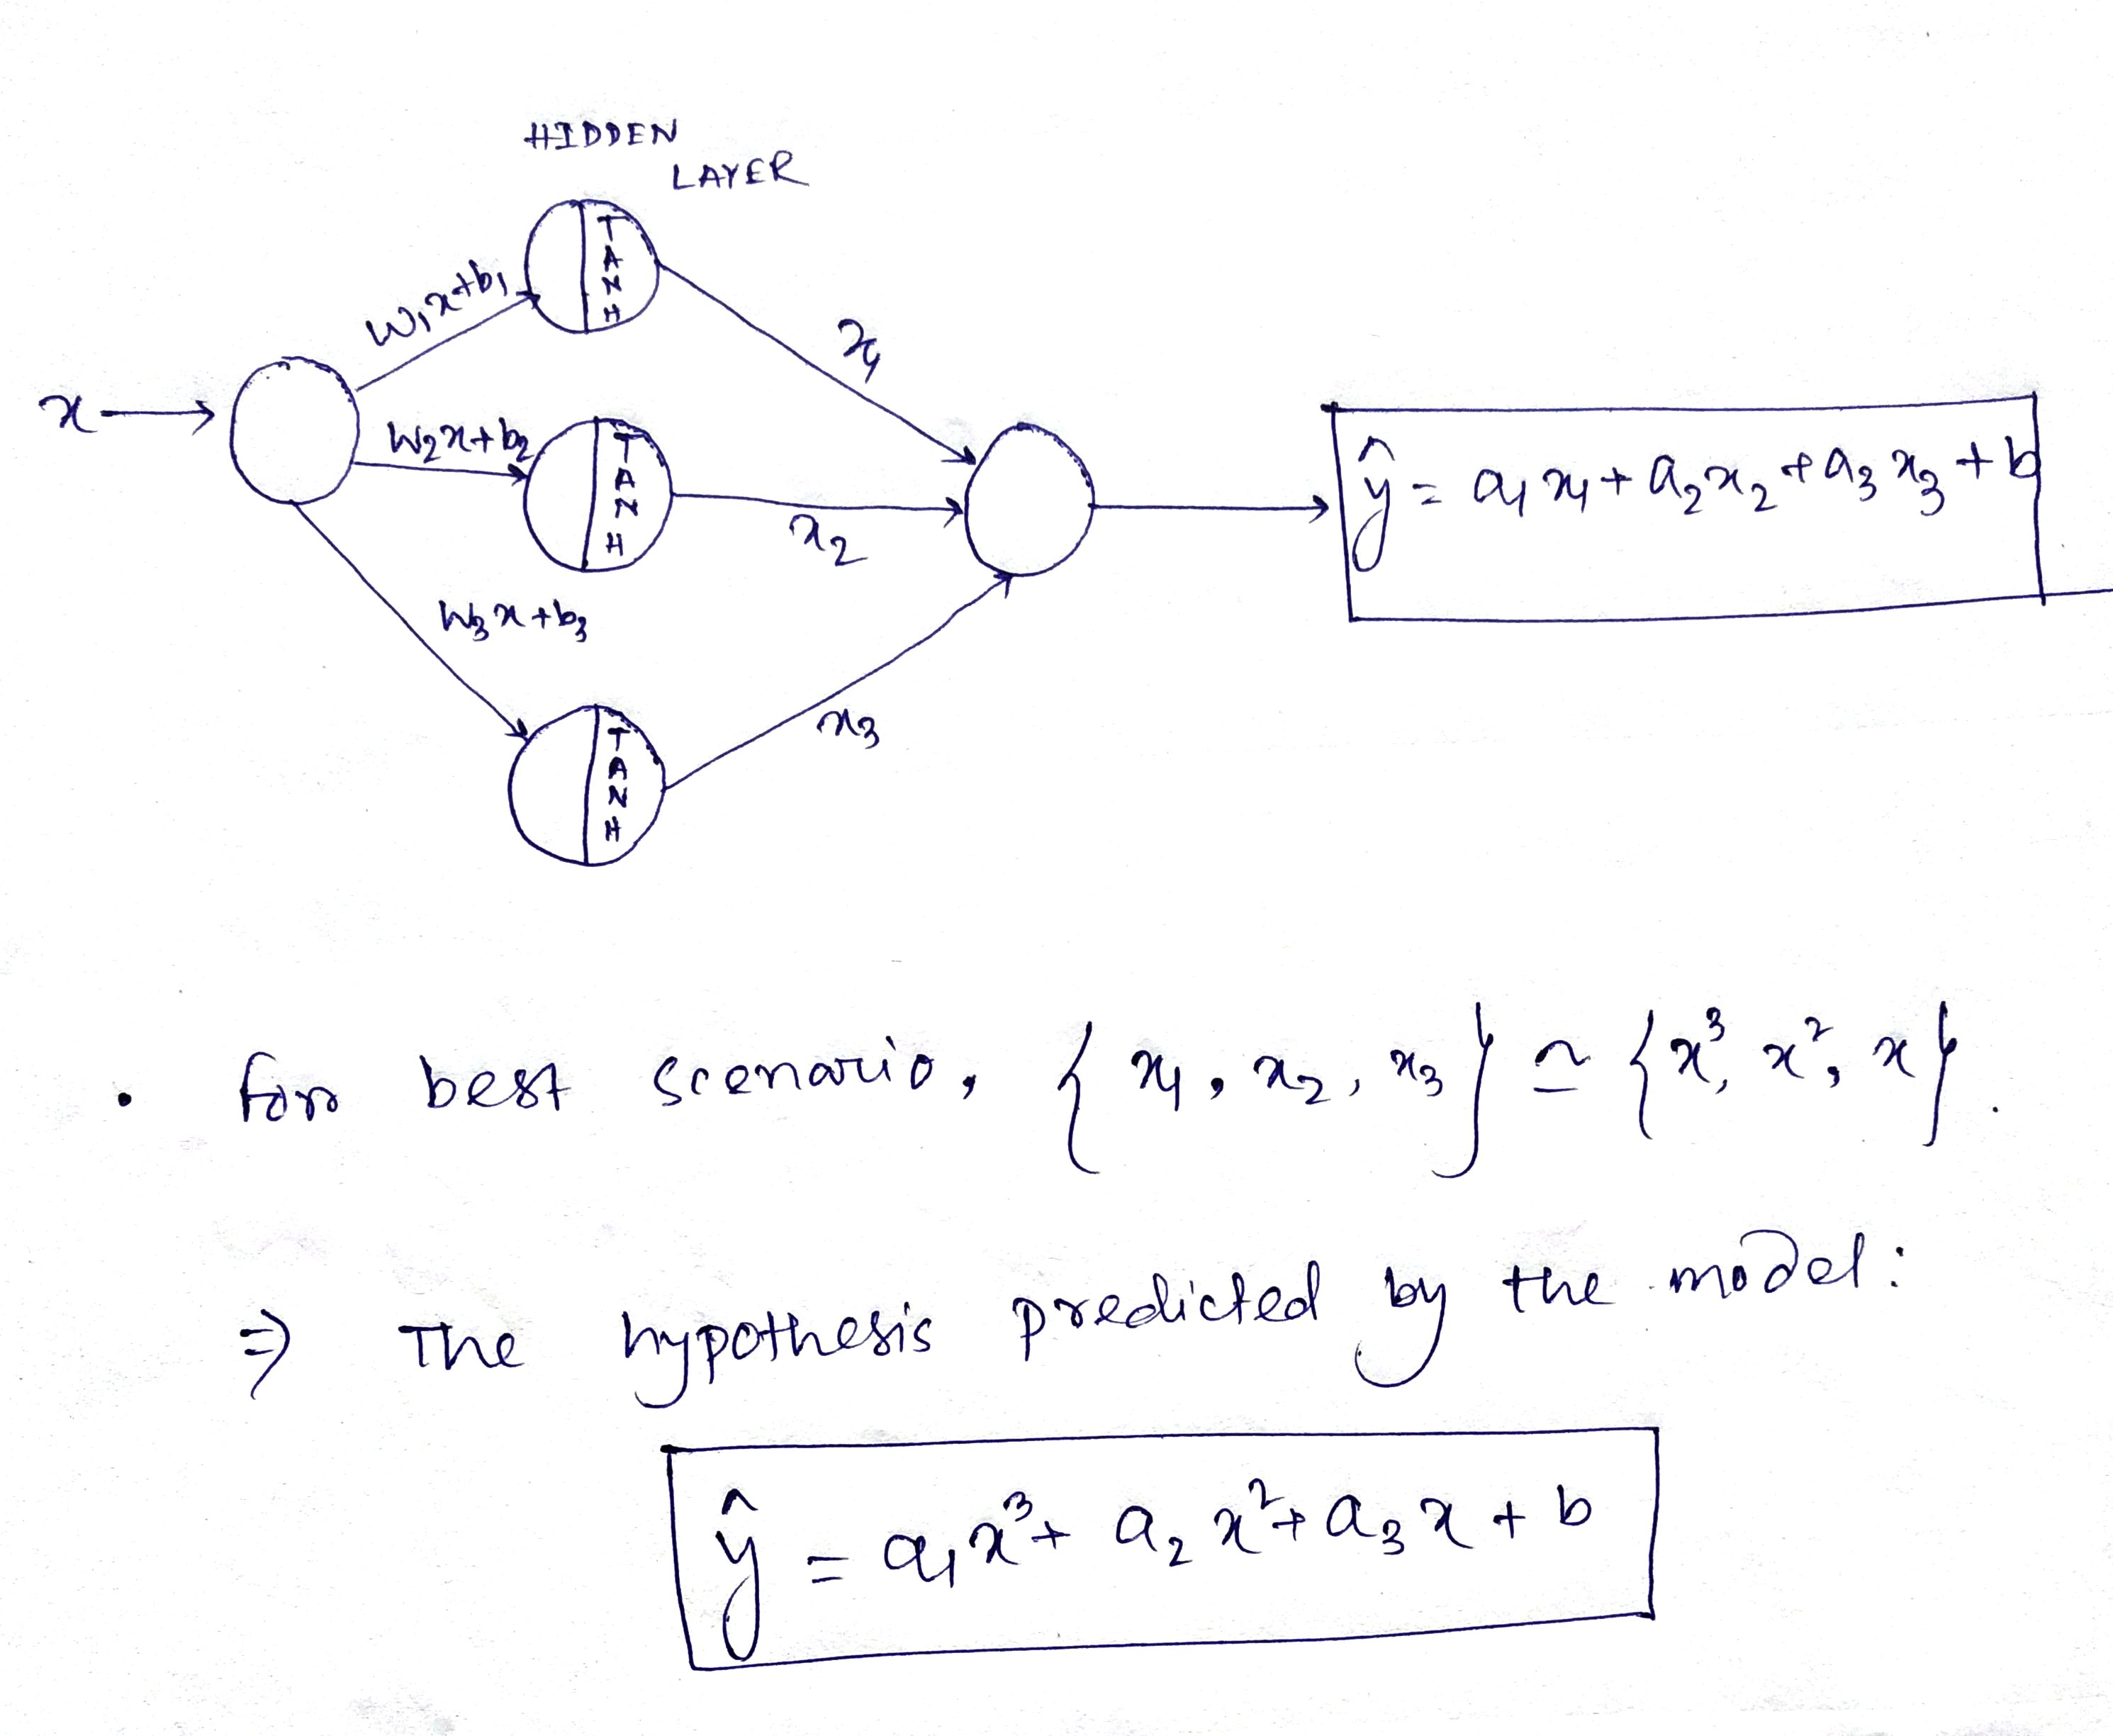

# Equation(s) of Hypothesis

## Equations of Inputs for hidden layer

In [ ]:
k=0
for i in range(0,3):
  w_i = model.layers[1].get_weights()[0][0][i]
  b_i = model.layers[1].get_weights()[1][i]


 


  
  print('Equation of %d node in the first hisdden layer' %(i+1) + ' is : %s X'%np.round(w_i,decimals = 2), '+%s'%np.round(b_i,decimals = 2) )

Equation of 1 node in the first hisdden layer is : -3.21 X +2.95
Equation of 2 node in the first hisdden layer is : 1.64 X +-0.64
Equation of 3 node in the first hisdden layer is : -1.99 X +-1.91


Equation of 1 node in the first hisdden layer is : $3.22\times X -2.95$

Equation of 2 node in the first hisdden layer is : $-1.64\times X +0.64$

Equation of 3 node in the first hisdden layer is : $1.98\times X +1.91$

## Equation of final hypothesis

In [ ]:

a_1 = model.layers[2].get_weights()[0][0][0]
a_2 = model.layers[2].get_weights()[0][1][0]
a_3 = model.layers[2].get_weights()[0][2][0]
b =  model.layers[2].get_weights()[1][0]
print('Final hypothesis is :' ,np.round(a_1 ,decimals=2),'*x_1', '+' ,np.round(a_2 ,decimals = 0),'*x_2', '+',np.round(a_3 ,decimals=2),'*x_3', '+' ,np.round(b,decimals = 2))

Final hypothesis is : -5.37 *x_1 + 4.0 *x_2 + -6.74 *x_3 + 9.35


**Final hypothesis is :$ 5.35 \times x_1 + -4.0 \times x_2 + 6.79 \times x_3 + 9.3$**

## Comparison

In [ ]:
x_eval = np.linspace(-123456789 , 123456987 , 100)
# creating a evenly spaced 100 values within[-123456789 , 123456789]
x_eval = x_eval/x_eval.max() # nomaliation .
y_eval =5*x_eval**3+2*x_eval**2+6*x_eval+8 # Ground Truth y values .

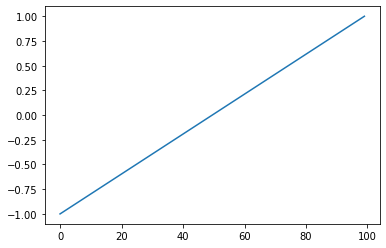

In [ ]:
plt.plot(x_eval)

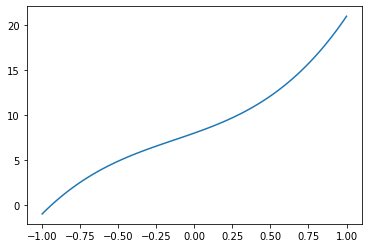

In [ ]:
plt.plot( x_eval ,y_eval)

In [ ]:
y_pred = model.predict(x_eval)


In [ ]:
y_pred.max() # maximum value of model predicted y values

20.788807

In [ ]:
y_eval.max()# maximum of  ground truth y values created by the equation

21.0

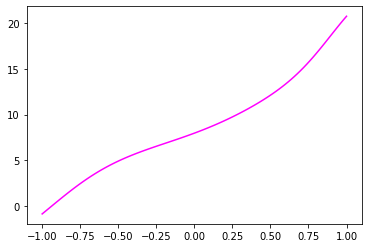

In [ ]:
plt.plot(x_eval,y_pred ,color = 'magenta')

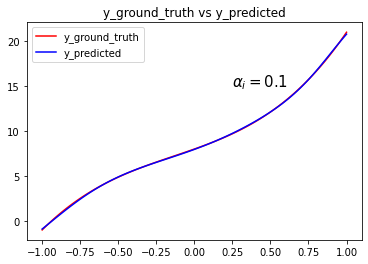

In [ ]:
plt.plot(x_eval , y_eval , color = 'red' )
plt.plot(x_eval,y_pred , color = 'blue')
plt.text(0.25 ,15,r'$\alpha_i = 0.1$ ' ,fontsize = 15)
plt.title(r'y_ground_truth vs y_predicted')
plt.legend(['y_ground_truth' , 'y_predicted'])
plt.savefig('poly_fit_0.1_best.png')
plt.show()